The dataset comes from the UCI Machine Learning repository, and it is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict whether the client will subscribe (1/0) to a term deposit (variable y). 


https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv



In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [0]:
from google.colab import files
uploaded = files.upload()

Saving banking.csv to banking.csv


In [0]:
data = pd.read_csv('banking.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(41188, 21)
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y']


In [0]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,68,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,204,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,191,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,174,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,191,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


### Data Fields

1. age (numeric)
2. job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
3. marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
4. education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
5. default: has credit in default? (categorical: “no”, “yes”, “unknown”)
6. housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
7. loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
8. contact: contact communication type (categorical: “cellular”, “telephone”)
9. month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
10. day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
16. emp.var.rate: employment variation rate — (numeric)
17. cons.price.idx: consumer price index — (numeric)
18. cons.conf.idx: consumer confidence index — (numeric)
19. euribor3m: euribor 3 month rate — (numeric)
20. nr.employed: number of employees — (numeric)


y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

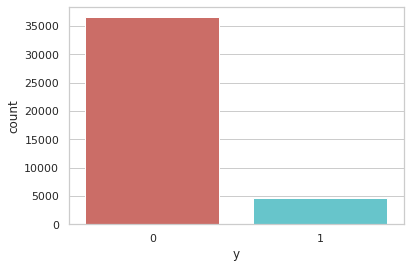

In [0]:
sns.countplot(x='y',data=data, palette='hls')
plt.show()

In [0]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

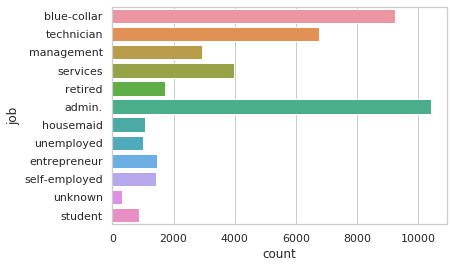

In [0]:
sns.countplot(y="job", data=data)
plt.show()

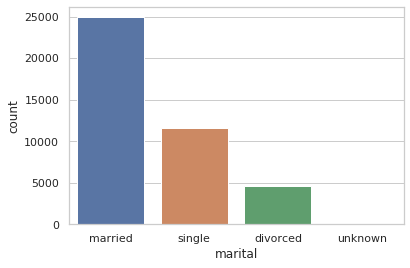

In [0]:
sns.countplot(x="marital", data=data)
plt.show()

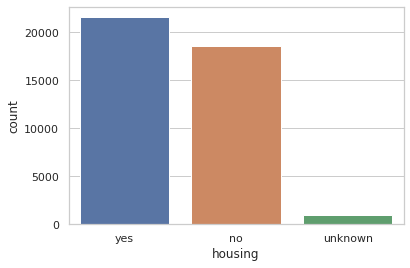

In [0]:
sns.countplot(x="housing", data=data)
plt.show()

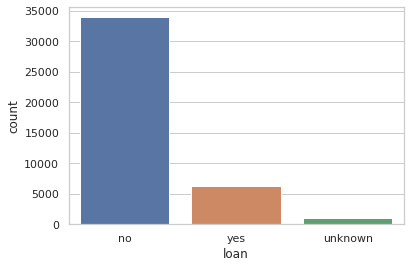

In [0]:
sns.countplot(x="loan", data=data)
plt.show()

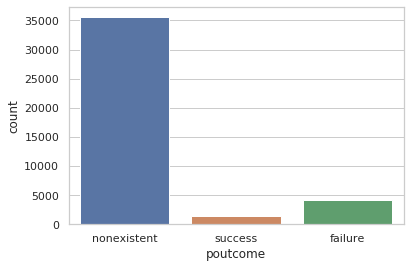

In [0]:
sns.countplot(x="poutcome", data=data)
plt.show()

Our prediction will be based on the customer’s job, marital status, whether he(she) has credit in default, whether he(she) has a housing loan, whether he(she) has a personal loan, and the outcome of the previous marketing campaigns. So, we will drop the variables that we do not need.

In [0]:
data.drop(data.columns[[0, 3, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19]], axis=1, inplace=True)

In [0]:
data.head()

,job,marital,default,housing,loan,poutcome,y
0,blue-collar,married,unknown,yes,no,nonexistent,0
1,technician,married,no,no,no,nonexistent,0
2,management,single,no,yes,no,success,1
3,services,married,no,no,no,nonexistent,0
4,retired,married,no,yes,no,success,1


In [0]:
data2 = pd.get_dummies(data, columns =['job', 'marital', 'default', 'housing', 'loan', 'poutcome'])

In [0]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1


In [0]:
data2.drop(data2.columns[[12, 16, 18, 21, 24]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_no', 'housing_yes', 'loan_no', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [0]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1


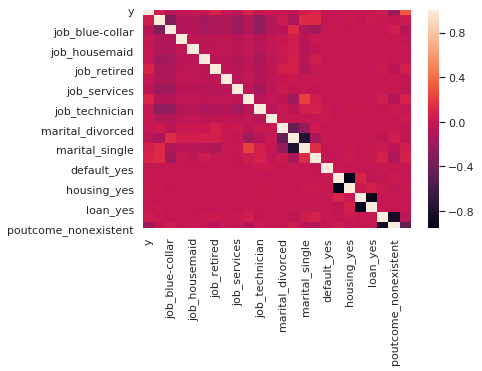

In [0]:
sns.heatmap(data2.corr())
plt.show()

In [0]:
print (data2.corr())

                             y  ...  poutcome_success
y                     1.000000  ...          0.316269
job_admin.            0.031426  ...          0.025069
job_blue-collar      -0.074423  ...         -0.061403
job_entrepreneur     -0.016644  ...         -0.017238
job_housemaid        -0.006505  ...          0.002276
job_management       -0.000419  ...         -0.001302
job_retired           0.092221  ...          0.068061
job_self-employed    -0.004663  ...         -0.012871
job_services         -0.032301  ...         -0.028558
job_student           0.093955  ...          0.083321
job_technician       -0.006149  ...         -0.005036
job_unemployed        0.014752  ...          0.024612
marital_divorced     -0.010608  ...         -0.010612
marital_married      -0.043398  ...         -0.029876
marital_single        0.054133  ...          0.039238
default_no            0.099344  ...          0.075763
default_yes          -0.003041  ...         -0.001585
housing_no           -0.0110

In [0]:
data2.head()

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1


In [0]:
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
X_train.shape

(30891, 23)

In [0]:
clf = LogisticRegression(random_state=0, solver='newton-cg',class_weight = {0:1, 1:6}, C = 20, max_iter= 100)
clf.fit(X_train, y_train)

LogisticRegression(C=20, class_weight={0: 1, 1: 6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = clf.predict(X_test)
print (y_pred.shape, y_test.shape)

# confusion_matrix = confusion_matrix(np.asarray(y_test), y_pred)
# print(confusion_matrix)


(10297,) (10297,)


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[8345  811]
 [ 742  399]]


In [0]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.85


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      9156
           1       0.33      0.35      0.34      1141

    accuracy                           0.85     10297
   macro avg       0.62      0.63      0.63     10297
weighted avg       0.85      0.85      0.85     10297



The purpose of this section is to visualize logistic regression classsifiers’ decision boundaries. In order to better vizualize the decision boundaries, we’ll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions.

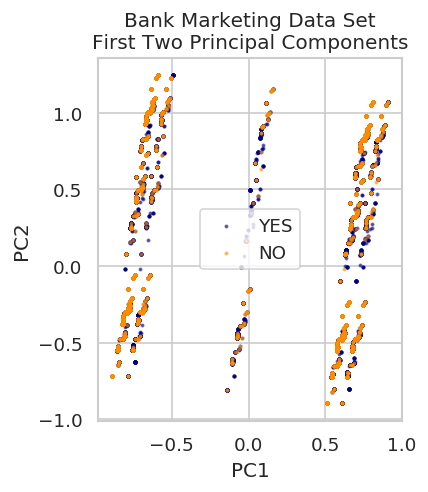

In [0]:
from sklearn.decomposition import PCA
X = data2.iloc[:,1:]
y = data2.iloc[:,0]
pca = PCA(n_components=2).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)

plt.figure(dpi=120)
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='YES', s=2, color='navy')
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='NO', s=2, color='darkorange')
plt.legend()
plt.title('Bank Marketing Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


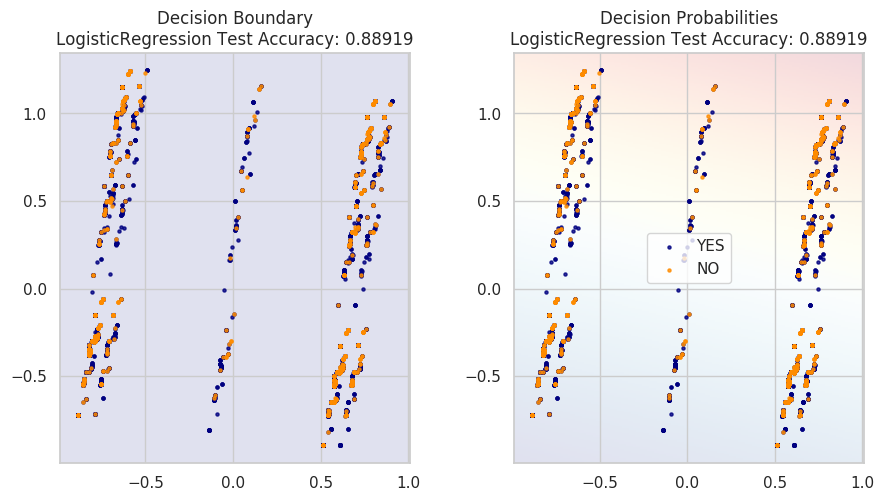

In [0]:
def plot_bank(X, y, fitted_model):
  plt.figure(figsize=(9.8,5), dpi=100)
  for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
      plt.subplot(1,2,i+1)
      mesh_step_size = 0.01  # step size in the mesh
      x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
      y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
      if i == 0:
          Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
      else:
          try:
              Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
          except:
              plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                   verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
              plt.axis('off')
              break
      Z = Z.reshape(xx.shape)
      plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.8, label='YES', s=5, color='navy')
      plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.8, label='NO', s=5, color='darkorange')
      plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                 extent=(x_min, x_max, y_min, y_max), origin='lower')
      plt.title(plot_type + '\n' + 
                str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
      plt.gca().set_aspect('equal');
  plt.tight_layout()
  plt.legend()
  plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)
model = LogisticRegression()
model.fit(X_train,y_train)
plot_bank(X_test, y_test, model)
plt.show()